# Data Visualization Exercise

For this exercise, use your creativity and understanding of the different concepts of data visualization.

Create a plot (or a series of subplots) from whatever dataset you choose. As much as possible, please choose a dataset of relevance for visual storytelling. Make the plot using `python`. It doesn't matter if you choose to use `matplotlib` or `seaborn`. 

For the submission:
1. Upload the code that generates the plot to your GitHub repository or to Google Classroom (whichever method you're using for submissions).
2. Upload a png file of the visualization to Google Classroom and write in the Private Comments the caption for the figure you submitted.
3. Make sure to provide the data source in the same folder.

Please make an effort to make it a good and compelling graphic. Choose your colors according to the type of data you're visualizing. Make sure to label everything and avoid clutter. 

As a reference for color choices, you can go to [CARTOColors](https://carto.com/carto-colors/). Simply click on the color map of your choice and it will copy the HEX code of the color.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Source

Edit this cell to place the direct link to your data source.

You may use the datasets you've downloaded for your project as your submission for this assignment. 

### Exploratory Data Analysis

The data I have analyzed for this assignment comes from this [Kaggle website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). 

The title of the Kaggle Competition is House Prices: Advanced Regression Techniques.

In particular, I used the `train.csv` file and renamed it to `train_housing_prices.csv`.

In [2]:
data = pd.read_csv('train_housing_prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The data has 1461 rows and 81 columns

In [3]:
data.shape

(1460, 81)

I chose seven columns for this exercise with the following definitions:

- __LotArea__: Lot size in square feet
- __LotFrontage__: Linear feet of street connected to property
- __LotShape__: General shape of property
- __OverallCond*__: Rates the overall condition of the house
- __OverallQual*__: Rates the overall material and finish of the house
- __YearBuilt__: Original construction date
- __SalePrice__: Sale price of house in $

*The ratings below are reserved for OverallCond and OverallQual

`
10 Very Excellent
9 Excellent
8 Very Good
7 Good
6 Above Average
5 Average
4 Below Average
3 Fair
2 Poor
1 Very Poor
`


In [4]:
# Perform your data wrangling and descriptive stats to help

data_seven = data[['LotArea', 'LotFrontage', 'LotShape', 'OverallCond', 'OverallQual', 'YearBuilt', 'SalePrice']]
data_seven.head()

,LotArea,LotFrontage,LotShape,OverallCond,OverallQual,YearBuilt,SalePrice
0,8450,65.0,Reg,5,7,2003,208500
1,9600,80.0,Reg,8,6,1976,181500
2,11250,68.0,IR1,5,7,2001,223500
3,9550,60.0,IR1,5,7,1915,140000
4,14260,84.0,IR1,5,8,2000,250000


### The First Plot: Sale Price vs Year Built with Overall Quality

For the first plot, I wanted to combine three features: sale price and year built, together with overall quality of house.

Generally, the sale price of houses increases over time due to inflation, but you can notice over the years that overall quality has also improved. 

You will also notice that there seems to be a direct correlation between sale price and overall quality. Indeed, you get what you pay for!

Text(0.5, 1.0, 'Sale Price vs Year Built')

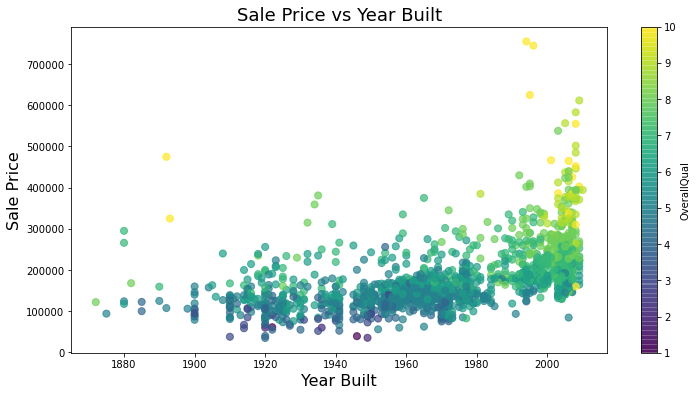

In [5]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

data_seven.plot.scatter(ax=ax, x='YearBuilt', y='SalePrice', c='OverallQual', cmap='viridis', s=50, alpha=0.7)
ax.set_xlabel('Year Built', fontsize=16)
ax.set_ylabel('Sale Price', fontsize=16)
ax.set_title('Sale Price vs Year Built', fontsize=18)

# fig.savefig('1stPlot_Bennett_Justin.png')

### The Second Plot: Overall Quality vs Year Built

I wanted to see if history plays a role in shaping the quality of houses.

Since this data reflects US housing, you will notice a parabolic (convex) curve trend with the dip around ~1920s extending all the way to ~1940s. The 20s and 40s were the period of the Great Depression and World War II, respectively.

This indicates that historical periods seem to directly influence the quality of houses (or the _perceived quality_ of houses.) 

Text(0.5, 1.0, 'Overall Quality of House vs Year Built')

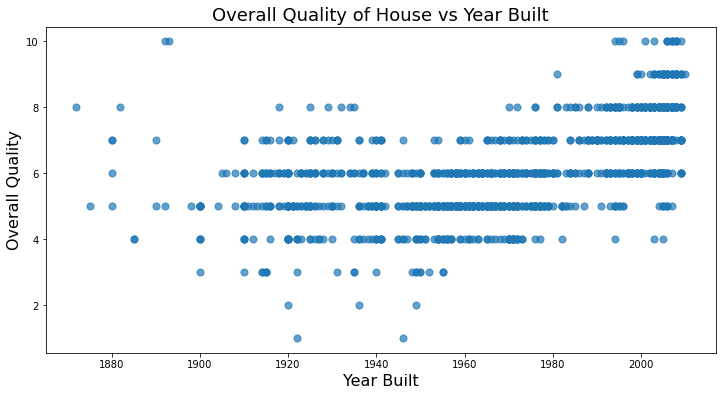

In [6]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

data_seven.plot.scatter(ax=ax, x='YearBuilt', y='OverallQual', s=50, alpha=0.7)
ax.set_xlabel('Year Built', fontsize=16)
ax.set_ylabel('Overall Quality', fontsize=16)
ax.set_title('Overall Quality of House vs Year Built', fontsize=18)

# fig.savefig('2ndPlot_Bennett_Justin.png')

### The Third Plot: Lot Frontage vs Lot Area

This plot is highly experimental. I just wanted to check that if the Lot Area increases, the Lot Frontage increases as well. According to the scatter plot, that isn't necessarily the case. 

With the exception of a handful of outliers, most lot frontages don't exceed 200ft.

Text(0.5, 1.0, 'Lot Frontage vs Lot Area')

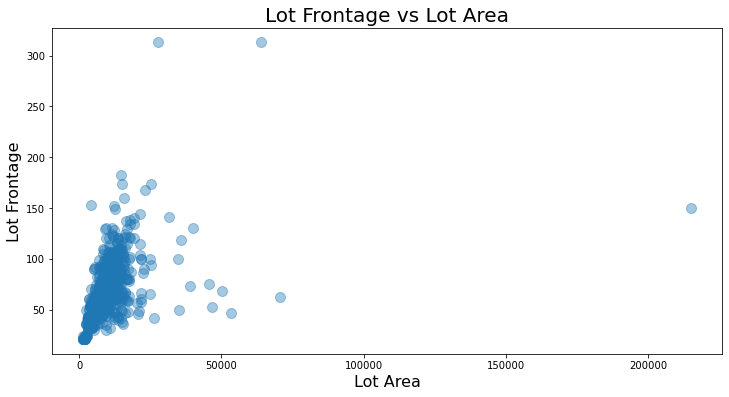

In [7]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111)

# by setting the format of the plot to 'o' or '.', it automatically changes the plot from a line to a scatter plot
ax.plot(data_seven['LotArea'], data_seven['LotFrontage'], 'o', ms=10, alpha=0.4)
ax.set_xlabel('Lot Area', fontsize=16)
ax.set_ylabel('Lot Frontage', fontsize=16)
ax.set_title('Lot Frontage vs Lot Area', fontsize=20)

# fig.savefig('3rdPlot_Bennett_Justin.png')